In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,Dense,GlobalMaxPooling1D,Conv1D,Embedding,MaxPooling1D
from tensorflow.keras.models import Model

In [4]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns=['labels','data']

In [8]:
df['b_labels']=df['labels'].map({'ham':0,'spam':1})
Y=df['b_labels'].values
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
x_train,x_test,y_train,y_test=train_test_split(df['data'],Y,test_size=0.33)

In [10]:
#converting sentences into sequences
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
sequences_train=tokenizer.texts_to_sequences(x_train)
sequences_test=tokenizer.texts_to_sequences(x_test)

In [11]:
#word to idx
word2idx=tokenizer.word_index
V= len(word2idx)
print(f"found {V} unique tokens")

found 7218 unique tokens


In [12]:
#pad sequences so that we get NxT matrix
data_train=pad_sequences(sequences_train)
print("shape of data train: ",data_train.shape)
#get sequence length
T=data_train.shape[1]

shape of data train:  (3733, 162)


In [13]:
data_test=pad_sequences(sequences_test,maxlen=T)
print("shape of data test: ",data_test.shape)

shape of data test:  (1839, 162)


In [22]:
#create the model
#we get to choose embedding dimensionality
D=20
#hidden state dimensionality
M=15

#note:we actually want to size of the embedding to (V+1)xd,
#because the first index start from 1 not 0
#thus if the final index of embedding matrix is V
#the actally it must have the size of V+1
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)

x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)

x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)

x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)

x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

In [23]:
#compile and fit
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
r=model.fit(data_train,y_train,epochs=20,validation_data=(data_test,y_test))

Epoch 1/20
117/117 [==============================] - 3s 26ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0828 - val_accuracy: 0.9869
Epoch 2/20
117/117 [==============================] - 2s 17ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0831 - val_accuracy: 0.9869
Epoch 3/20
117/117 [==============================] - 2s 15ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0885 - val_accuracy: 0.9869
Epoch 4/20
117/117 [==============================] - 2s 16ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0843 - val_accuracy: 0.9864
Epoch 5/20
117/117 [==============================] - 2s 16ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0899 - val_accuracy: 0.9864
Epoch 6/20
117/117 [==============================] - 2s 17ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0893 - val_accuracy: 0.9869
Epoch 7/20
117/117 [==============================] - 5s 40ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0882 - val_accuracy: 0.9859

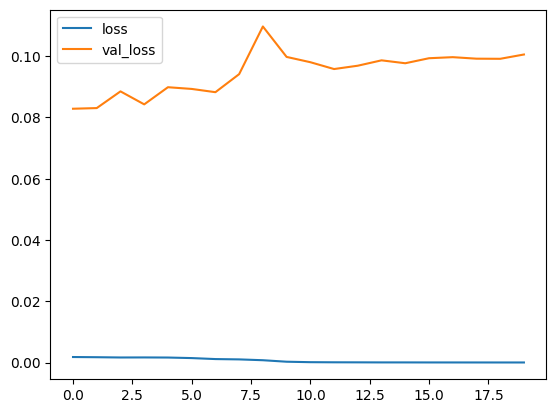

In [27]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

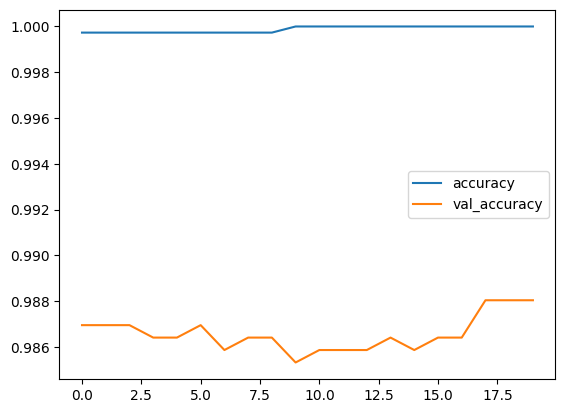

In [28]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()